"\nSick! it's the exact same as what's given in the qutip module. Let's thrown in a Gaussian into this\nbitch. Actually before that let's consider RWA false, and see what that gives us. Also I think this \ncode can be simplified significantly.\n"

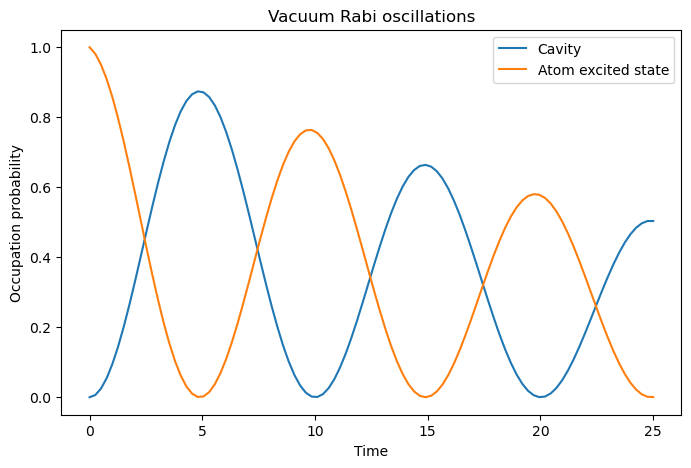

In [2]:
'''
So all I'm going to do here is repeat the code with no other fancy additions.
'''

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100) 

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom 
#Change to ground when adding the Gaussian


# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

'''
So notice the difference between the RWA and the non-RWA only the coupling terms are considered in the
RWA whereas the non-coupling terms are included in the non-RWA. I think they made a mistake when
writing out the Hamiltonian in the code. 
'''

#So notice the difference between the RWA and the non-RWA only the coupling terms are considered in 
#the RWA whereas the non-coupling terms are included in the non-RWA. I think they made a mistake when
#writing out the Hamiltonian in the code. 

c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)
    
#I like the way this is written, perhaps something to yoink into your code. 

output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

# e_ops could've been simplified with the number operator.

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

'''
Sick! it's the exact same as what's given in the qutip module. Let's thrown in a Gaussian into this
bitch. Actually before that let's consider RWA false, and see what that gives us. Also I think this 
code can be simplified significantly.
'''
